# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [202]:
housing_data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
print(housing_data.shape)
housing_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [203]:
# Get a count of NaN values in features containing them
housing_data.isna().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
dtype: int64

In [204]:
# Drop 5 features with the highest NaN count and `Id`
housing_data = housing_data.drop(columns=['PoolQC', 'MiscFeature', 
                                      'Alley', 'Fence', 'FireplaceQu', 'Id'])

In [205]:
# Find non-numeric features and encode them with integers
non_numeric = housing_data.select_dtypes(exclude='number').columns
len(non_numeric), non_numeric

(38, Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'))

In [206]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category', 'object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding: ' +feature)
    return df

In [207]:
non_numeric_encoded = dummyEncode(housing_data[non_numeric].copy())
non_numeric_encoded.head()

Error encoding: MasVnrType
Error encoding: BsmtQual
Error encoding: BsmtCond
Error encoding: BsmtExposure
Error encoding: BsmtFinType1
Error encoding: BsmtFinType2
Error encoding: Electrical
Error encoding: GarageType
Error encoding: GarageFinish
Error encoding: GarageQual
Error encoding: GarageCond


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,SBrkr,2,6,Attchd,RFn,TA,TA,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,SBrkr,3,6,Attchd,RFn,TA,TA,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,SBrkr,2,6,Attchd,RFn,TA,TA,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,SBrkr,2,6,Detchd,Unf,TA,TA,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,SBrkr,2,6,Attchd,RFn,TA,TA,2,8,4


In [208]:
# Validate type casting
housing_data[non_numeric] = non_numeric_encoded
housing_data.dtypes.value_counts()

int64      34
int32      27
object     11
float64     3
dtype: int64

# Baseline Multiple Regression

In [209]:
def run_linear_model(X, y):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, 
                                                        test_size=0.20, random_state=42)
    
    # Fit model with training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions using test features
    y_pred = model.predict(X_test)
    
    # Compare results to test target
    # Root Mean Squared Error
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    
    # R-squared: variance of the target variable explained
    r2 = r2_score(y_test, y_pred)
    
    print('RMSE: ', rmse)
    print('R^2 score: ', r2)
    print('Model intercept: ', model.intercept_)
    
    coefficients = pd.Series(model.coef_, X_train.columns)
    print('Coefficients\n', coefficients.to_string())

In [210]:
# Sort features with the highest correlation coefficients with regard to the target variable
target = 'SalePrice'
features = housing_data.corr()['SalePrice']\
            .sort_values(ascending=False)\
            .index[1:15]\
            .tolist()

In [211]:
# Check for NaNs in selected features
housing_data[features].isna().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
BsmtFinSF1       0
dtype: int64

In [212]:
housing_data[['GarageYrBlt', 'MasVnrArea']] = \
housing_data[['GarageYrBlt', 'MasVnrArea']].ffill()

In [213]:
housing_data[features].isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
dtype: int64

In [214]:
# Partially feature-engineered baseline multiple regression model (no squared features etc)
X = housing_data[features]
y = housing_data[target]

run_linear_model(X, y)

RMSE:  38015.01239658992
R^2 score:  0.8115932584250742
Model intercept:  -1261575.8781009333
Coefficients
 OverallQual     19039.070041
GrLivArea          36.576718
GarageCars      11989.439267
GarageArea          8.714046
TotalBsmtSF         6.799161
1stFlrSF            9.151410
FullBath        -2522.257849
TotRmsAbvGrd     2058.625799
YearBuilt         172.542235
YearRemodAdd      370.205695
GarageYrBlt        63.932241
MasVnrArea         21.071470
Fireplaces       9135.952700
BsmtFinSF1         18.844245


## Calculate log-transformed y variable & plot against features

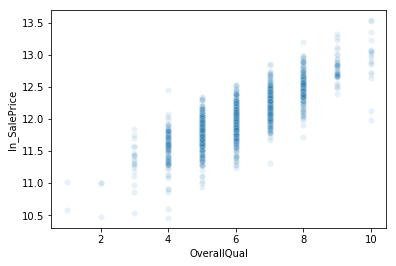

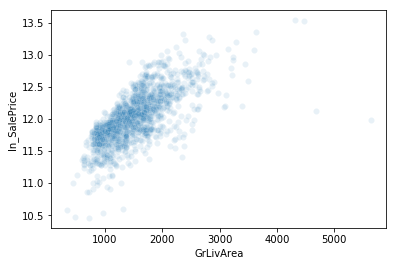

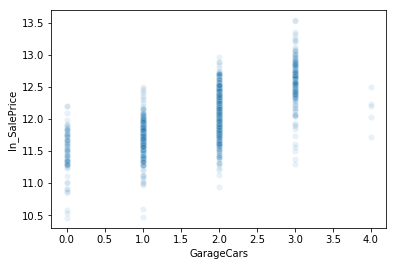

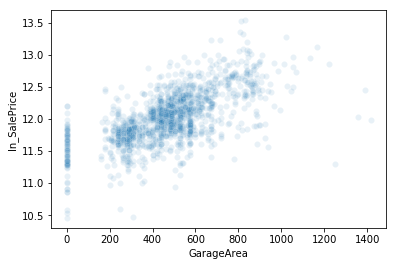

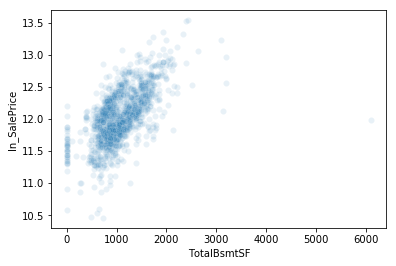

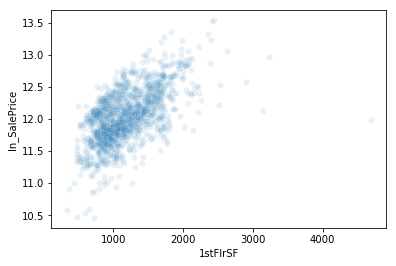

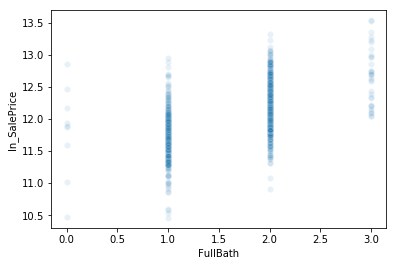

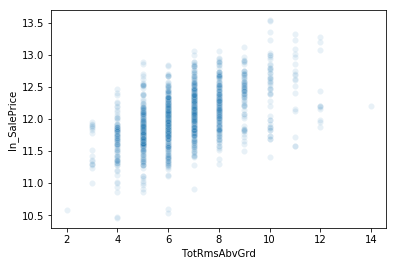

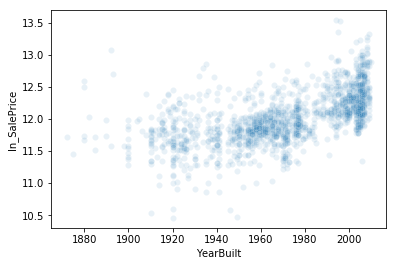

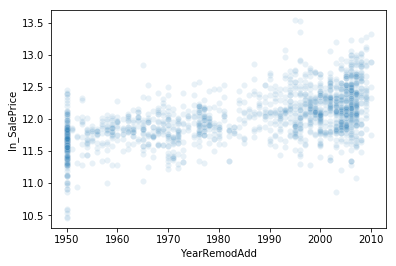

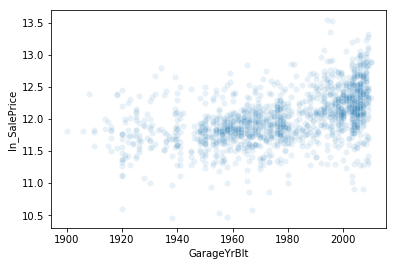

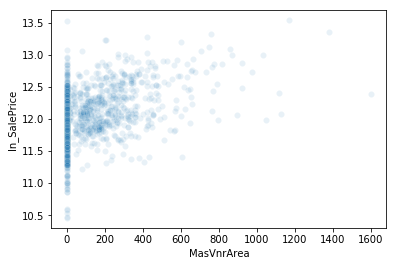

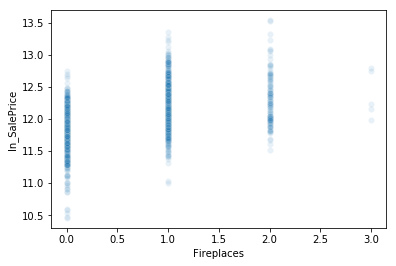

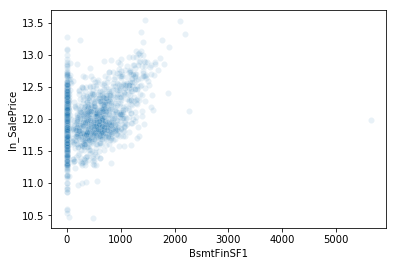

In [215]:
# Reduce skew/normalize y variable by taking the natural log
housing_data['ln_SalePrice'] = np.log(housing_data['SalePrice'])
target = 'ln_SalePrice'

for feature in features:
    sns.scatterplot(data=housing_data, x=feature, y=target, alpha=0.1)
    plt.show()

## Engineer features: `OverallQual_squared` and `GrLivArea_squared`

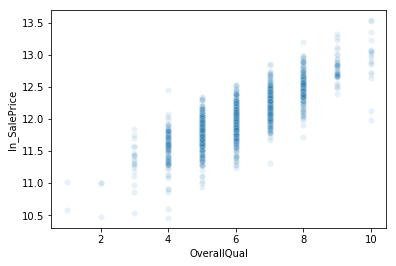

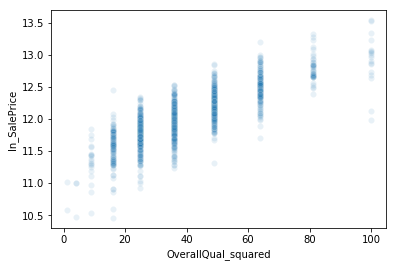

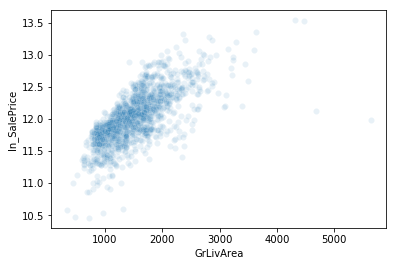

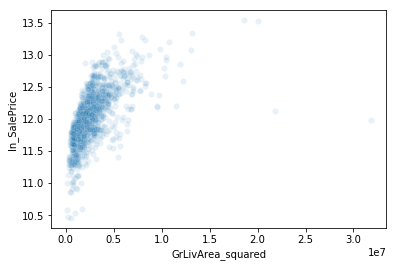

In [216]:
housing_data['OverallQual_squared'] = housing_data['OverallQual']**2
housing_data['GrLivArea_squared'] = housing_data['GrLivArea']**2
features.extend(['OverallQual_squared', 'GrLivArea_squared'])

for feature in ['OverallQual', 'OverallQual_squared',
                'GrLivArea', 'GrLivArea_squared']:
    sns.scatterplot(data=housing_data, x=feature, y=target, alpha=0.1)
    plt.show()

## Compute interaction terms

In [217]:
interaction_terms = housing_data[['FullBath', 'TotRmsAbvGrd']]
poly = PolynomialFeatures(interaction_only=True, include_bias = False)
poly.fit_transform(interaction_terms)

array([[ 2.,  8., 16.],
       [ 2.,  6., 12.],
       [ 2.,  6., 12.],
       ...,
       [ 2.,  9., 18.],
       [ 1.,  5.,  5.],
       [ 1.,  6.,  6.]])

# Model Statistics

In [219]:
X = housing_data[features]
y = housing_data[target]

run_linear_model(X, y)

RMSE:  0.16683596669450565
R^2 score:  0.8508455333556513
Model intercept:  2.7811557615008375
Coefficients
 OverallQual            3.305384e-02
GrLivArea              6.758725e-04
GarageCars             4.280311e-02
GarageArea             1.395421e-04
TotalBsmtSF            8.452879e-05
1stFlrSF              -8.451622e-06
FullBath              -2.101773e-02
TotRmsAbvGrd           6.053474e-04
YearBuilt              1.881705e-03
YearRemodAdd           2.624182e-03
GarageYrBlt           -5.151042e-04
MasVnrArea            -1.846685e-05
Fireplaces             5.572047e-02
BsmtFinSF1             1.055055e-04
OverallQual_squared    3.909839e-03
GrLivArea_squared     -1.189652e-07


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data